In [22]:
# Sebastian Raschka 2014-2026
# mlxtend Machine Learning Library Extensions
#
# A function for loading the open-source Iris Flower dataset.
# Author: Sebastian Raschka <sebastianraschka.com>
#
# License: BSD 3 clause

import os

import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

this_dir = os.path.dirname(os.getcwd())
DATA_PATH = os.path.join(this_dir, "data", "iris.csv.gz")
print(DATA_PATH)



def iris_data(version="uci"):
    """Iris flower dataset.

    Source : https://archive.ics.uci.edu/ml/datasets/Iris
    Number of samples : 150
    Class labels : {0, 1, 2}, distribution: [50, 50, 50]
        0 = setosa, 1 = versicolor, 2 = virginica.

    Dataset Attributes:

        - 1) sepal length [cm]
        - 2) sepal width [cm]
        - 3) petal length [cm]
        - 4) petal width [cm]


    Parameters
    --------
    version : string, optional (default: 'uci').
      Version to use {'uci', 'corrected'}. 'uci' loads the dataset
      as deposited on the UCI machine learning repository, and
      'corrected' provides the version that is consistent with
      Fisher's original paper. See Note for details.


    Returns
    --------
    X, y : [n_samples, n_features], [n_class_labels]
        X is the feature matrix with 150 flower samples as rows,
        and 4 feature columns sepal length, sepal width,
        petal length, and petal width.
        y is a 1-dimensional array of the class labels {0, 1, 2}


    Note
    --------
    The Iris dataset (originally collected by Edgar Anderson) and
    available in UCI's machine learning repository is different from
    the Iris dataset described in the original paper by  R.A. Fisher [1]).
    Precisely, there are two data points (row number
    34 and 37) in UCI's Machine Learning repository are different from the
    origianlly published Iris dataset. Also, the original version of the Iris
    Dataset, which can be loaded via `version='corrected'` is the same
    as the one in R.

    [1] . A. Fisher (1936). "The use of multiple measurements in taxonomic
    problems". Annals of Eugenics. 7 (2): 179–188

    Examples
    -----------
    For usage examples, please see
    https://rasbt.github.io/mlxtend/user_guide/data/iris_data/

    """
    if version == "uci":
        tmp = np.genfromtxt(fname=DATA_PATH, delimiter=",")
        X, y = tmp[:, :-1], tmp[:, -1]
        y = y.astype(int)
    elif version == "corrected":
        tmp = np.genfromtxt(fname=DATA_PATH, delimiter=",")
        X, y = tmp[:, :-1], tmp[:, -1]
        X[34] = [4.9, 3.1, 1.5, 0.2]
        X[37] = [4.9, 3.6, 1.4, 0.1]
        y = y.astype(int)
    else:
        raise ValueError("version must be 'uci' or 'corrected'.")
    return X, y

c:\Users\haykm\Files\apec_8222\final_project\mlxtend\mlxtend\data\data\iris.csv.gz


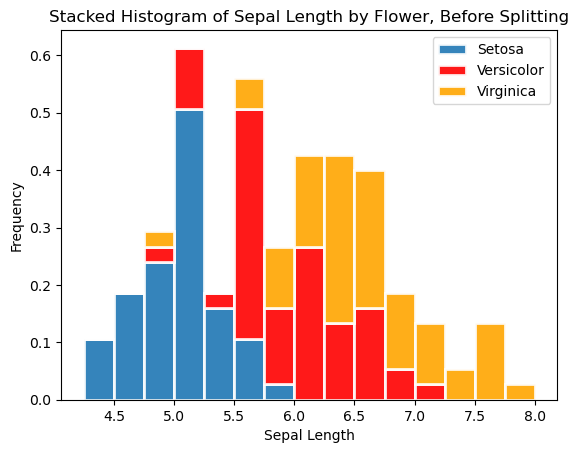

In [23]:
X = iris_data()[0]
y = iris_data()[1]
sepal_length = X[:, 0]

data = [
    sepal_length[y == 0],
    sepal_length[y == 1],
    sepal_length[y == 2]
]
bins = np.linspace(4.25, 8.0, 16)  # 15 bins → 16 edges

plt.figure()
plt.hist(
    data,
    bins=bins,
    stacked=True,
    density = True,
    label=['Setosa', 'Versicolor', 'Virginica'],
    color=['tab:blue', 'red', 'orange'],
    edgecolor='white',     # edges between stacked bars
    linewidth=2.0,         # thickness of edges
    alpha=0.9
)

plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.title('Stacked Histogram of Sepal Length by Flower, Before Splitting')
plt.legend()

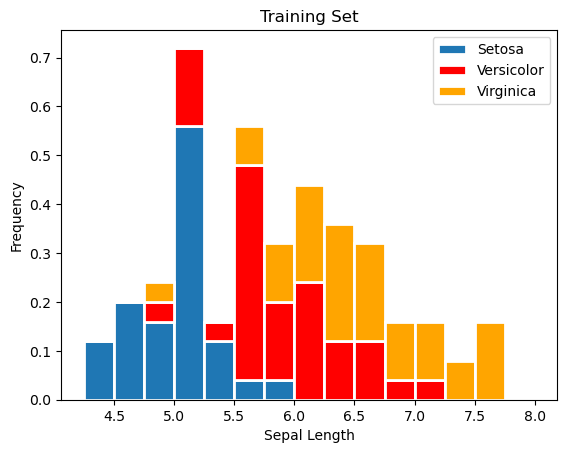

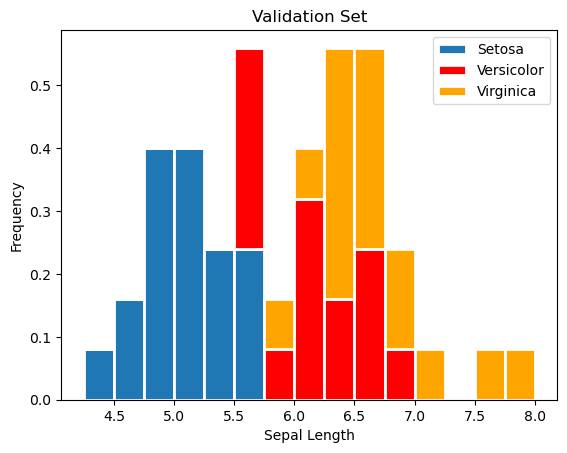

In [27]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=1/3,
    random_state=42  # optional, for reproducibility
)

def plot_stacked_sepal_hist(X_subset, y_subset, title):
    sepal_length = X_subset[:, 0]
    
    data = [
        sepal_length[y_subset == 0],
        sepal_length[y_subset == 1],
        sepal_length[y_subset == 2]
    ]
    
    # Fixed bins from 4.25 to 8
    bins = np.linspace(4.25, 8.0, 16)
    
    plt.figure()
    plt.hist(
        data,
        bins=bins,
        stacked=True,
        density=True,  # frequency instead of count
        label=['Setosa', 'Versicolor', 'Virginica'],
        color=['tab:blue', 'red', 'orange'],
        edgecolor='white',
        linewidth=2.0
    )
    plt.xlabel('Sepal Length')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.legend()
    plt.show()

plot_stacked_sepal_hist(X_train, y_train, 'Training Set')
plot_stacked_sepal_hist(X_val, y_val, 'Validation Set')